In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
cmap = plt.rcParams["axes.prop_cycle"].by_key()["color"]

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

In [2]:
illumina_df = pd.read_csv("ROC_data_20_way_illumina.R_data.csv")

In [3]:
illumina_df

,Unnamed: 0,Unnamed: 0.1,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,step_GT,error_rate,nb_of_correct_calls,nb_of_total_calls,recalls_wrt_truth_probes,nbs_of_truth_probes_found,nbs_of_truth_probes_in_total,recalls_wrt_variants_where_all_allele_seqs_were_found,recalls_wrt_variants_found_wrt_alleles,nbs_variants_where_all_allele_seqs_were_found,nbs_variants_found_wrt_alleles,nbs_variants_total,tool_long_name
0,0,44,samtools,100x,0,Not_App,Not_App,0,0.018076,1.545163e+06,1573608.0,0.914926,6355266,6946211,0.781310,0.796098,483088,492231.202509,618305,samtools_CP018206.1
1,1,45,samtools,100x,0,Not_App,Not_App,1,0.018004,1.544548e+06,1572865.0,0.914922,6354953,6945898,0.781142,0.796015,482984,492179.850988,618305,samtools_CP018206.1
2,2,46,samtools,100x,0,Not_App,Not_App,2,0.017395,1.543466e+06,1570790.0,0.914913,6354245,6945190,0.780759,0.795829,482747,492065.179763,618305,samtools_CP018206.1
3,3,47,samtools,100x,0,Not_App,Not_App,3,0.017281,1.542926e+06,1570058.0,0.914910,6353971,6944916,0.780557,0.795750,482622,492016.131703,618305,samtools_CP018206.1
4,4,48,samtools,100x,0,Not_App,Not_App,4,0.012606,1.540116e+06,1559779.0,0.914890,6352330,6943275,0.779699,0.795266,482090,491715.650742,618303,samtools_CP018206.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,545,1095,pandora no denovo,100x,0,0.0,1.0,6,0.001285,3.314382e+06,3318645.0,0.898355,6177715,6876697,0.732706,0.839230,453029,518892.315197,618296,pandora_illumina_nodenovo
546,546,1096,pandora no denovo,100x,0,0.0,1.0,7,0.001193,3.298030e+06,3301968.0,0.897801,6140420,6839402,0.724634,0.833975,448031,515635.087016,618286,pandora_illumina_nodenovo
547,547,1097,pandora no denovo,100x,0,0.0,1.0,8,0.001084,3.265862e+06,3269408.0,0.896976,6085690,6784672,0.711453,0.826128,439850,510746.964108,618242,pandora_illumina_nodenovo
548,548,1098,pandora no denovo,100x,0,0.0,1.0,9,0.000961,3.206627e+06,3209713.0,0.895601,5996294,6695276,0.689129,0.813909,425987,503120.239900,618153,pandora_illumina_nodenovo


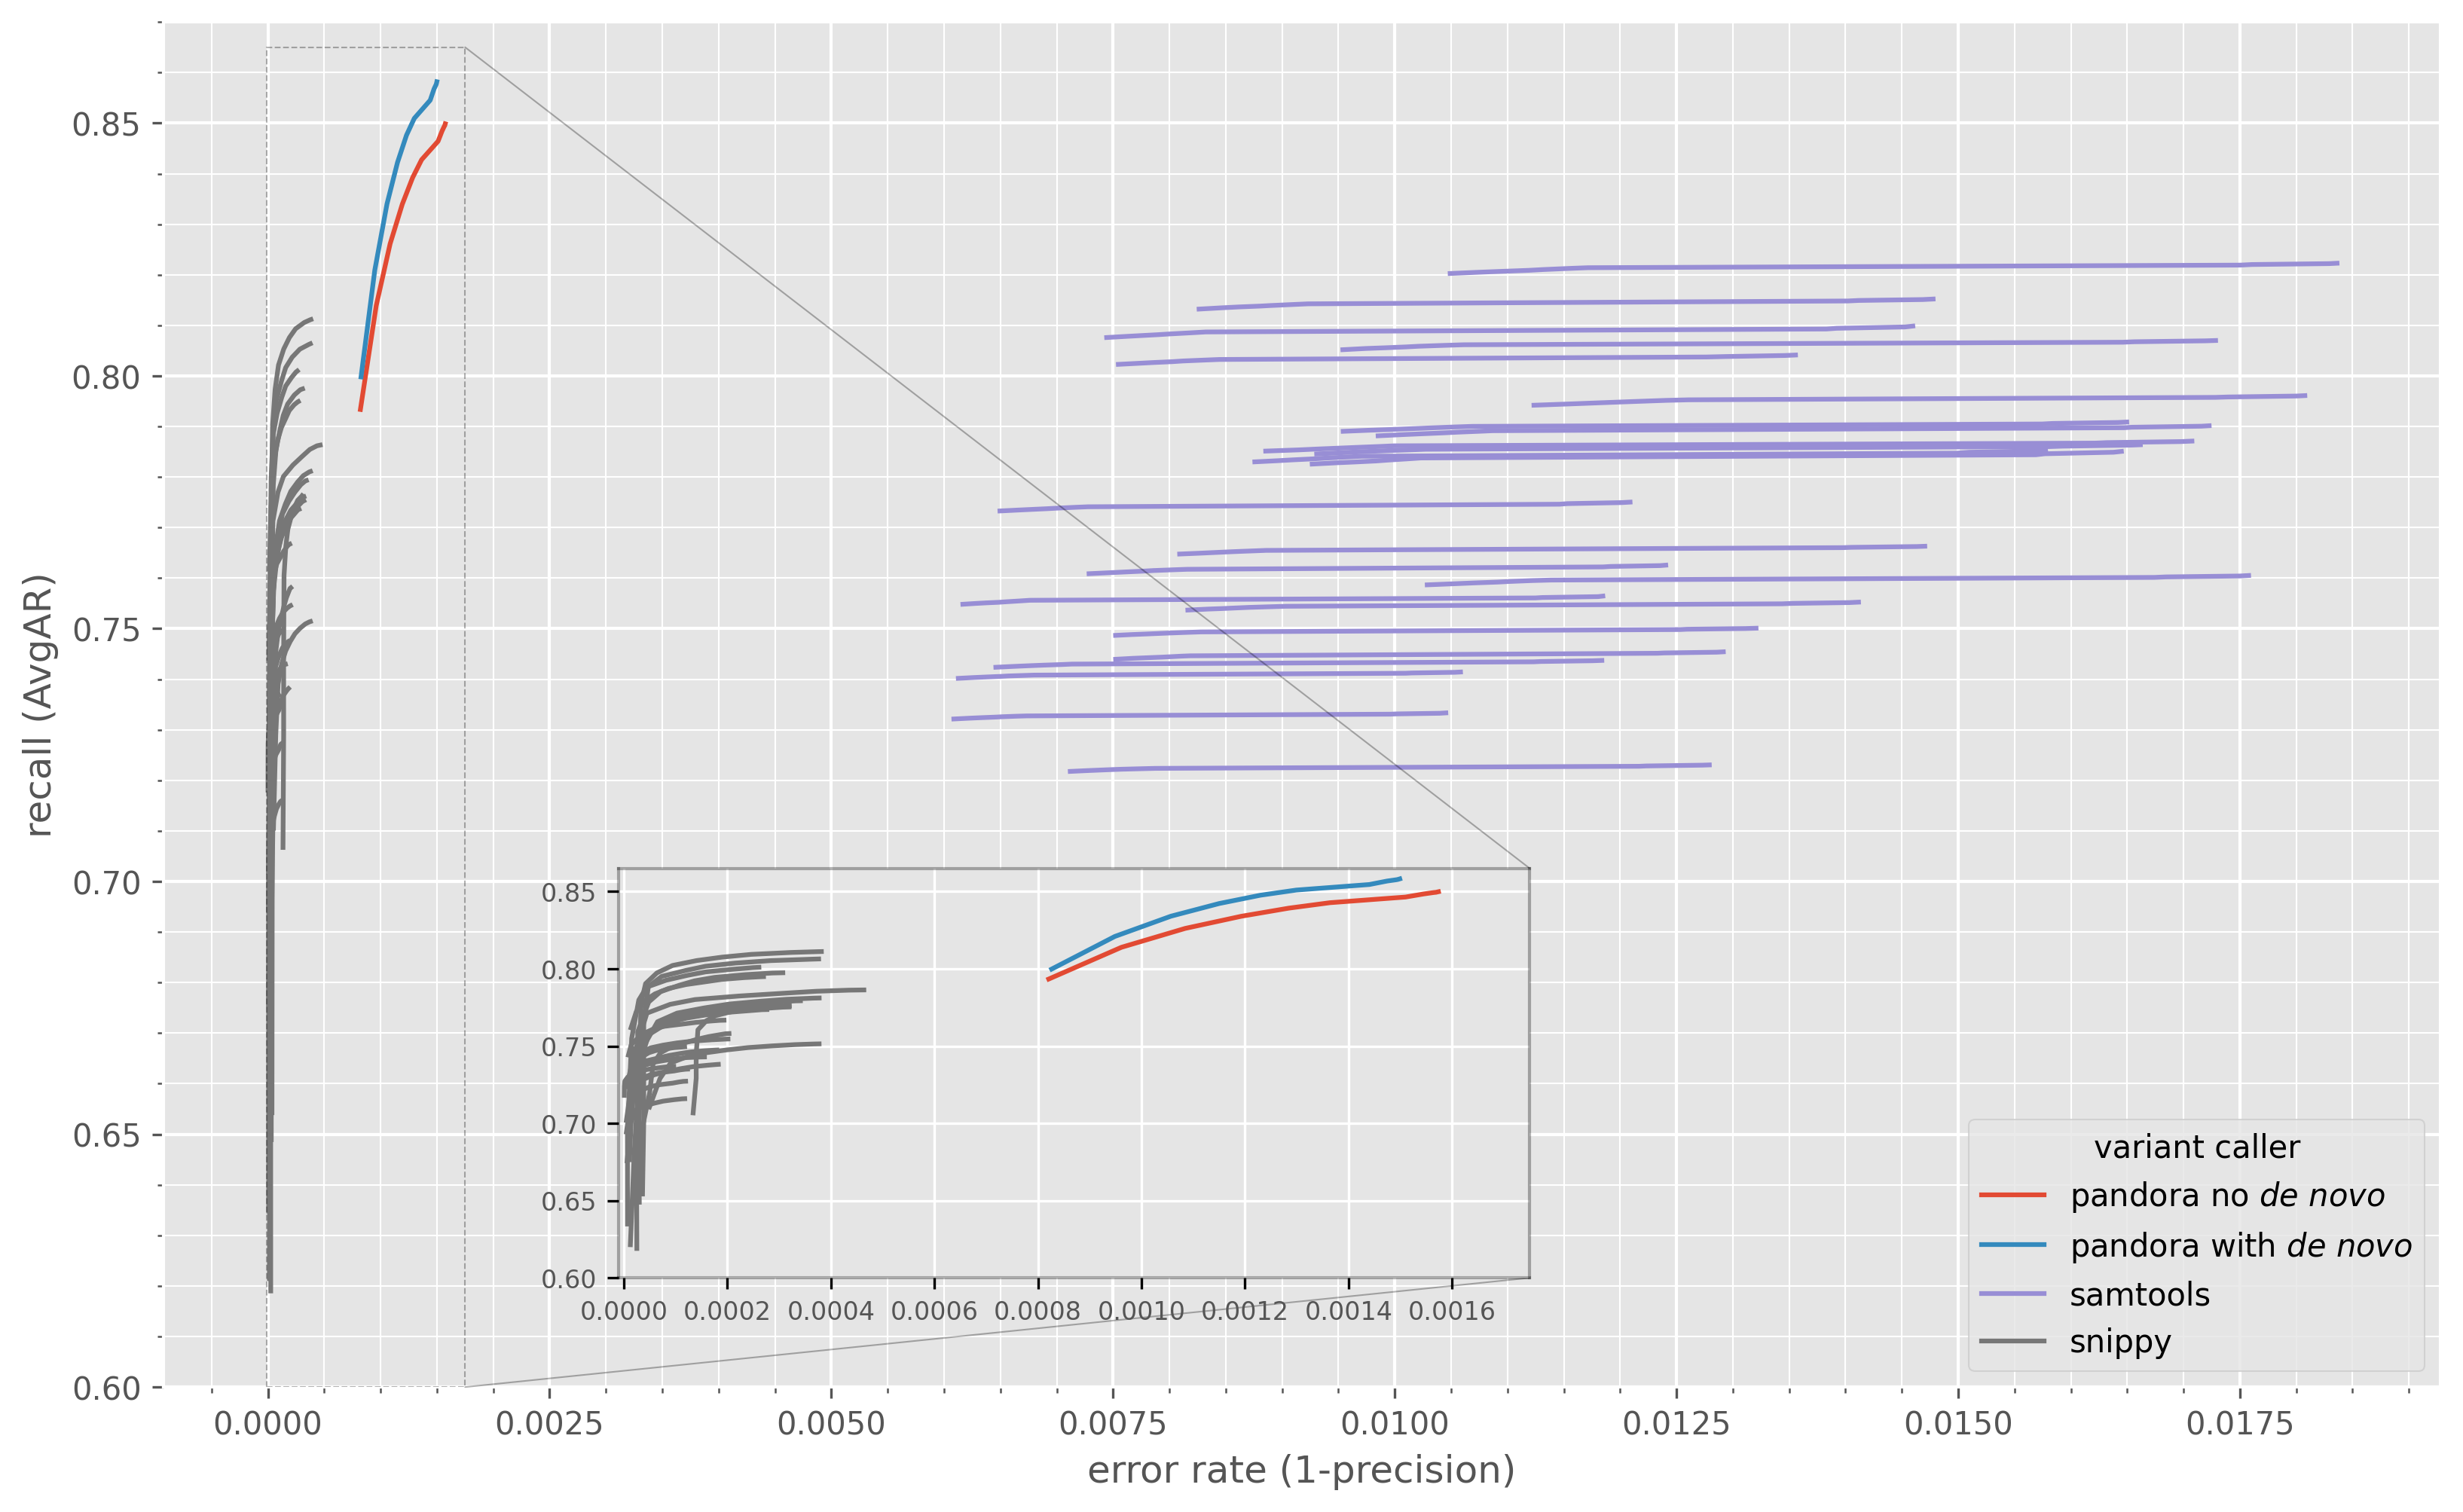

In [143]:
x = "error_rate"
y = "recalls_wrt_variants_found_wrt_alleles"
hue = "tool"
order="step_GT"
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)

# set the lower left corner of the zoom inset (x0, y0, width, height)
xmin = 0.2
ymin = 0.08
xmax = 0.4
ymax = 0.3
inset_bounds=[xmin, ymin, xmax, ymax]
axins = ax.inset_axes(inset_bounds)

for i, tool in enumerate(sorted(set(illumina_df[hue]))):
    colour = cmap[i]
    for ref in set(illumina_df.query("tool==@tool")["tool_long_name"]):
        data = illumina_df.query("tool_long_name==@ref")
        label = tool.replace("denovo", "$\it{de\ novo}$")
        sns.lineplot(data=data, x=x, y=y, color=colour, label=label, sort=False, ax=ax)
        # sub region of the original image
        axins = sns.lineplot(data=data, x=x, y=y, color=colour, label=label, sort=False, ax=axins)

handles, labels = ax.get_legend_handles_labels()
seen = set()
hs = []
ls = []
for i, lab in enumerate(labels):
    if lab not in seen:
        seen.add(lab)
        hs.append(handles[i])
        ls.append(lab)
        
ax.legend(hs, ls, loc="lower right", title="variant caller")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which="major", color="w", linewidth=1.0)
ax.grid(b=True, which="minor", color="w", linewidth=0.5)
ax.set(xlabel="error rate (1-precision)", ylabel="recall (AvgAR)", ylim=(0.60, 0.87))




# set the inset axis limits
axins.set_xlim((-0.00001, 0.00175))
axins.set_ylim((0.6, 0.865))

# remove axis labels on inset
axins.set_xlabel("")
axins.set_ylabel("")

# styling of the inset zoom lines
ax.indicate_inset_zoom(axins, alpha=0.3, edgecolor="black", linestyle="--")
axins.tick_params(color="black", labelsize=8)
# add a border to the inset
for spine in axins.spines.values():
    spine.set_edgecolor("black")
    spine.set_alpha(0.3)

axins.get_legend().remove()

In [145]:
illumina_df.query("step_GT==0 and tool=='pandora with denovo'")[y]

352    0.85818
Name: recalls_wrt_variants_found_wrt_alleles, dtype: float64

In [162]:
illumina_df.query("step_GT==0").groupby(["tool"])[y].max()

tool
pandora no denovo      0.849862
pandora with denovo    0.858180
samtools               0.822283
snippy                 0.811144
Name: recalls_wrt_variants_found_wrt_alleles, dtype: float64

In [163]:
1000*0.858180 - 1000*0.811144

47.03600000000006

In [153]:
illumina_df.query("error_rate>0.000096 and error_rate<0.000097")

,Unnamed: 0,Unnamed: 0.1,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,step_GT,error_rate,nb_of_correct_calls,nb_of_total_calls,recalls_wrt_truth_probes,nbs_of_truth_probes_found,nbs_of_truth_probes_in_total,recalls_wrt_variants_where_all_allele_seqs_were_found,recalls_wrt_variants_found_wrt_alleles,nbs_variants_where_all_allele_seqs_were_found,nbs_variants_found_wrt_alleles,nbs_variants_total,tool_long_name
113,113,256,snippy,100x,0,Not_App,Not_App,3,0.000097,1.258326e+06,1258448.0,0.877036,6086753,6940140,0.717068,0.733863,443365,453749.458353,618303,snippy_NC_007779.1
275,275,561,snippy,100x,0,Not_App,Not_App,0,0.000096,1.316456e+06,1316583.0,0.877910,6098149,6946211,0.722729,0.736857,446867,455602.126845,618305,snippy_CP010170.1
431,431,860,snippy,100x,0,Not_App,Not_App,2,0.000097,1.410831e+06,1410968.0,0.886469,6155187,6943491,0.732611,0.748959,452977,463084.858777,618305,snippy_CP010230.1


In [69]:
ont_df = pd.read_csv("ROC_data_20_way_nanopore.R_data.csv")

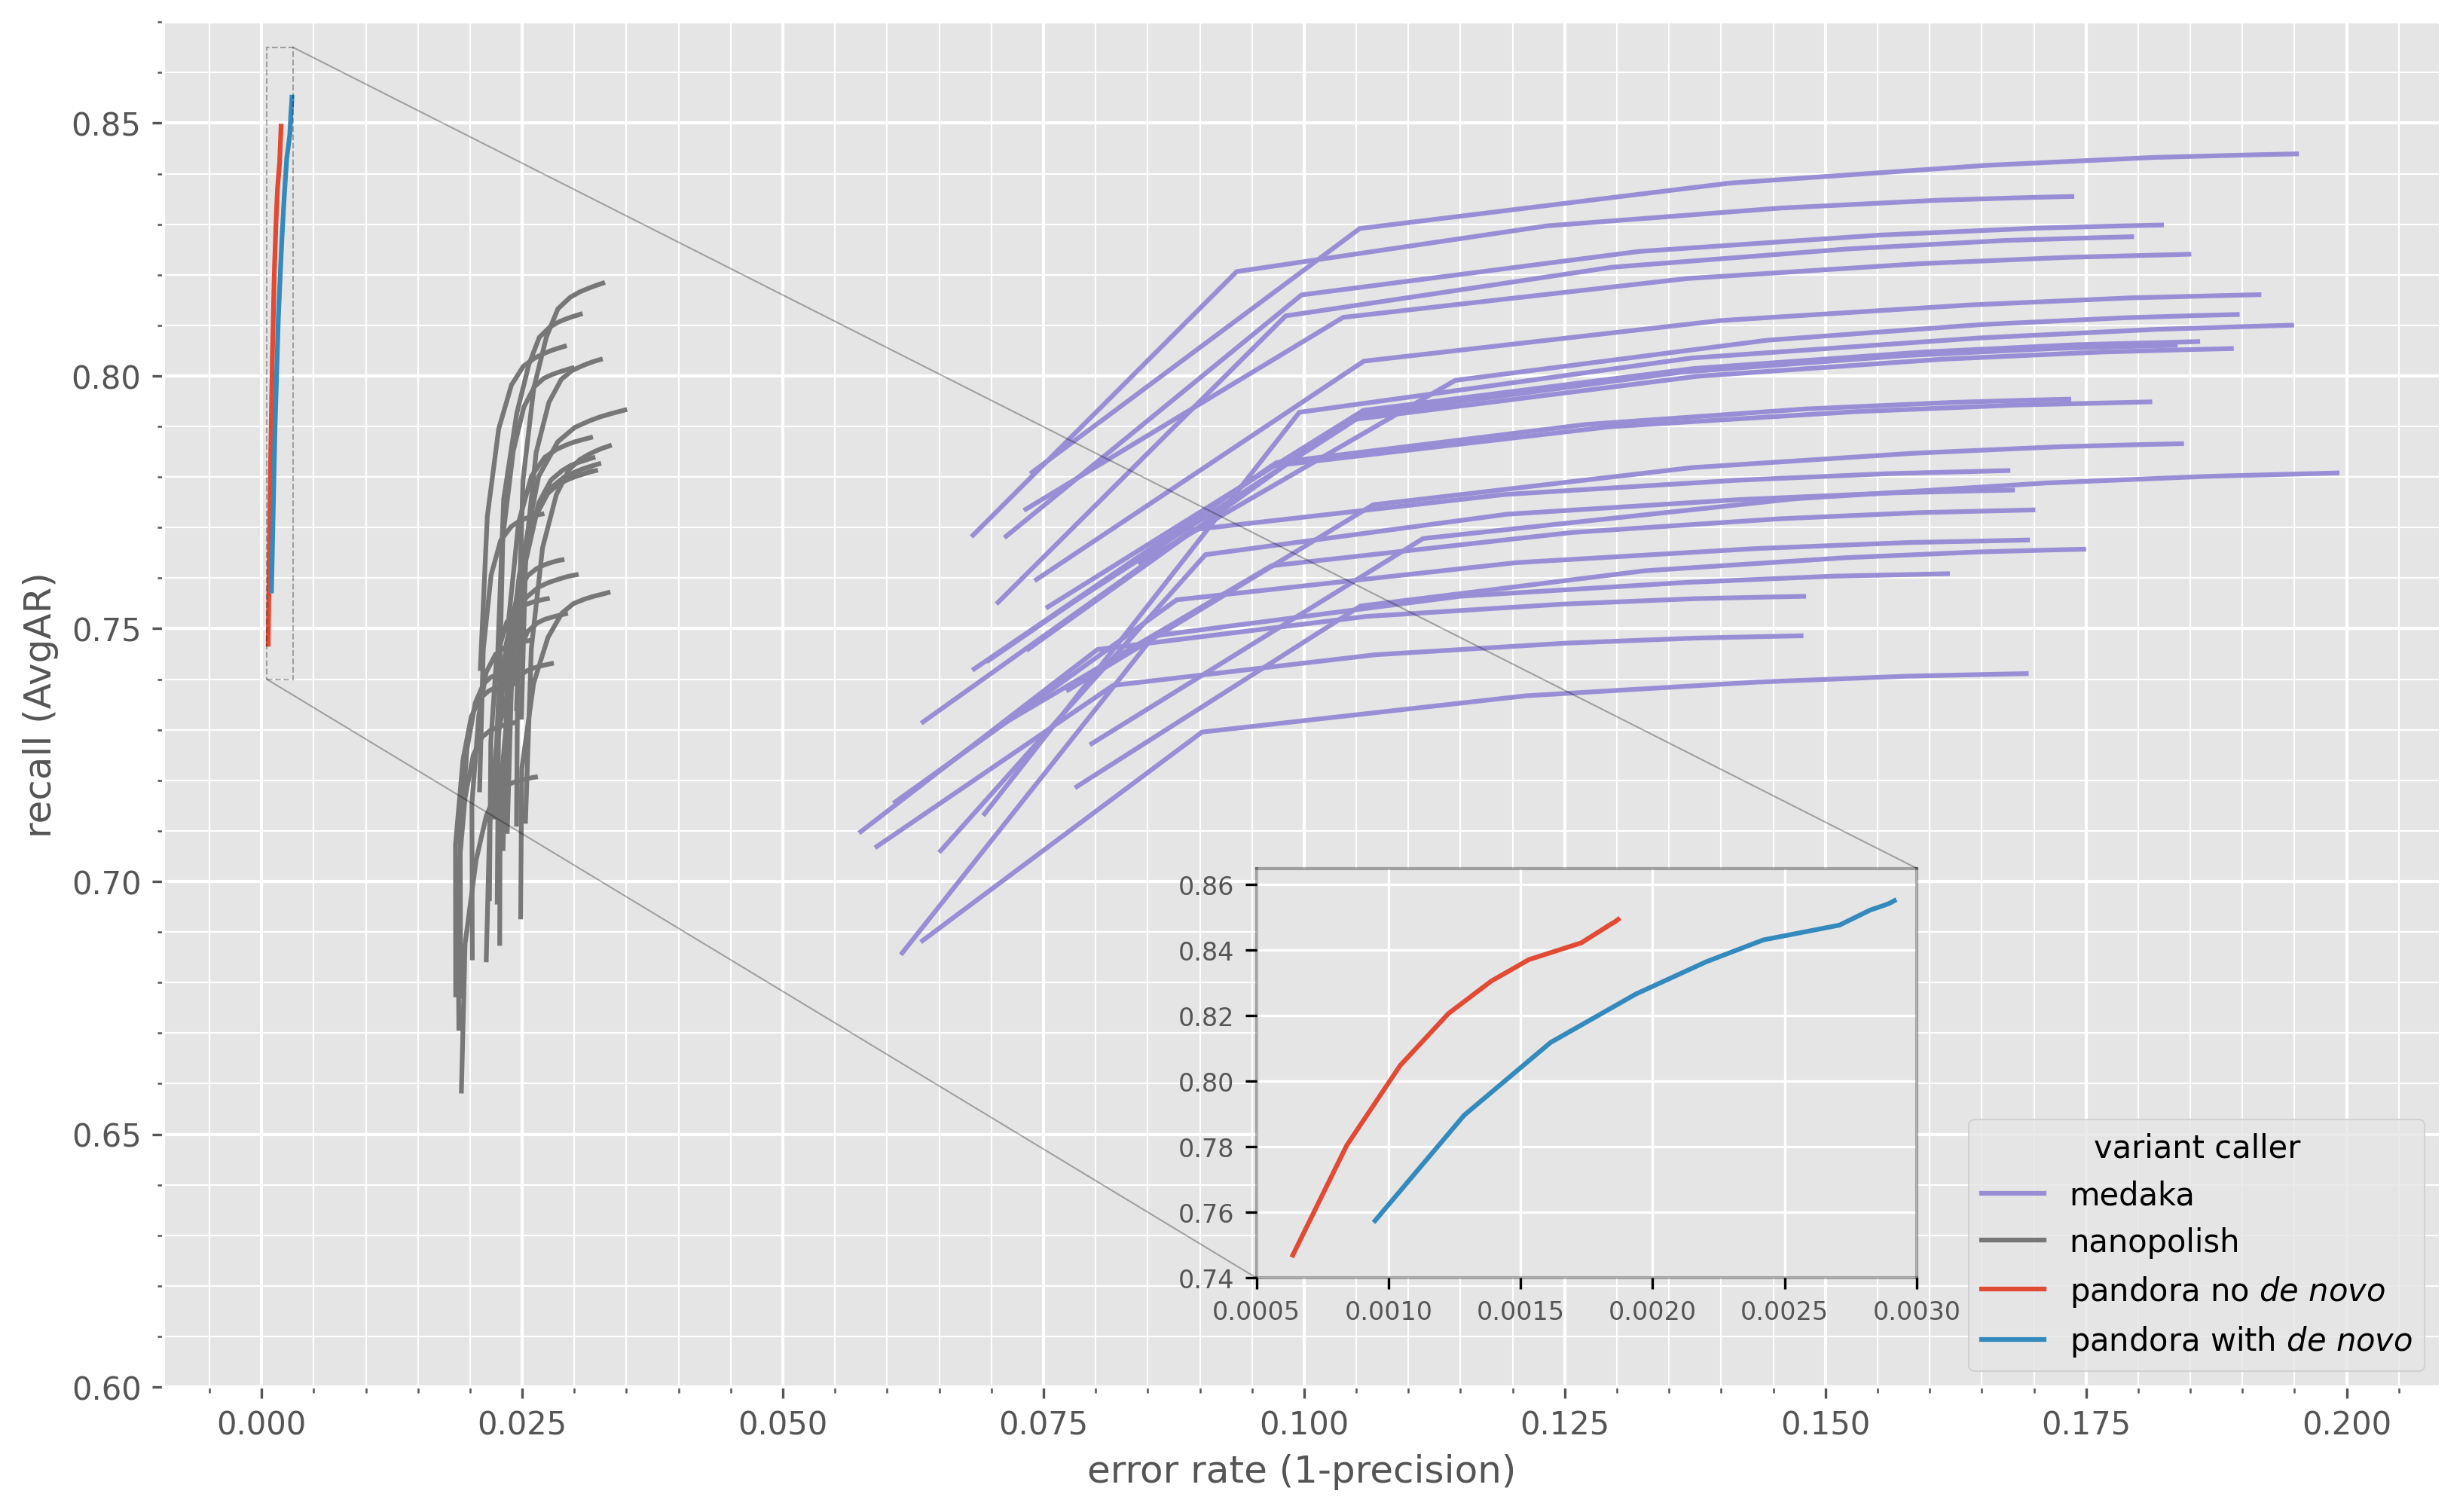

In [112]:
x = "error_rate"
y = "recalls_wrt_variants_found_wrt_alleles"
hue = "tool"
hue_order = ["pandora no denovo", "pandora with denovo", "medaka", "nanopolish"]
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)

# set the lower left corner of the zoom inset (x0, y0, width, height)
xmin = 0.48
ymin = 0.08
xmax = 0.29
ymax = 0.3
inset_bounds=[xmin, ymin, xmax, ymax]
axins = ax.inset_axes(inset_bounds)

for i, tool in enumerate(sorted(set(ont_df[hue]))):
    colour = cmap[hue_order.index(tool)]
    for ref in set(ont_df.query("tool==@tool")["tool_long_name"]):
        if tool == "medaka":
            prev_e = 1
            ixs = []
            for i, e in enumerate(ont_df.query("tool_long_name==@ref")["error_rate"]):
                if e < prev_e:
                    ixs.append(i)
                    prev_e = e
                else:
                    break
            data = ont_df.query("tool_long_name==@ref").iloc[ixs]
        else:
            data = ont_df.query("tool_long_name==@ref")
            
        label = tool.replace("denovo", "$\it{de\ novo}$")
        sns.lineplot(data=data, x=x, y=y, color=colour, label=label, sort=False, ax=ax)
        # sub region of the original image
        axins = sns.lineplot(data=data, x=x, y=y, color=colour, label=label, sort=False, ax=axins)

handles, labels = ax.get_legend_handles_labels()
seen = set()
hs = []
ls = []
for i, lab in enumerate(labels):
    if lab not in seen:
        seen.add(lab)
        hs.append(handles[i])
        ls.append(lab)
        
ax.legend(hs, ls, loc="lower right", title="variant caller")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which="major", color="w", linewidth=1.0)
ax.grid(b=True, which="minor", color="w", linewidth=0.5)
ax.set(xlabel="error rate (1-precision)", ylabel="recall (AvgAR)", ylim=(0.60, 0.87))




# set the inset axis limits
axins.set_xlim((0.0005, 0.003))
axins.set_ylim((0.74, 0.865))

# remove axis labels on inset
axins.set_xlabel("")
axins.set_ylabel("")

# styling of the inset zoom lines
ax.indicate_inset_zoom(axins, alpha=0.3, edgecolor="black", linestyle="--")
axins.tick_params(color="black", labelsize=8)
# add a border to the inset
for spine in axins.spines.values():
    spine.set_edgecolor("black")
    spine.set_alpha(0.3)

axins.get_legend().remove()

In [165]:
ont_df.query("step_GT==0").groupby(["tool"])[y].max()

tool
medaka                 0.843912
nanopolish             0.818337
pandora no denovo      0.849396
pandora with denovo    0.855130
Name: recalls_wrt_variants_found_wrt_alleles, dtype: float64

In [156]:
ont_df.query("step_GT==0").groupby(["tool"])[x].min()

tool
medaka                 0.147665
nanopolish             0.024080
pandora no denovo      0.001870
pandora with denovo    0.002915
Name: error_rate, dtype: float64

In [160]:
0.024080 * 1000 - 1000* 0.001870

22.21

In [161]:
0.147665 *1000 - 1000*0.001870

145.795

In [94]:
df = pd.read_csv("ROC_data_old_and_new_basecall.R_data.csv")

In [95]:
df

,Unnamed: 0,Unnamed: 0.1,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,step_GT,error_rate,nb_of_correct_calls,...,recalls_wrt_truth_probes,nbs_of_truth_probes_found,nbs_of_truth_probes_in_total,recalls_wrt_variants_where_all_allele_seqs_were_found,recalls_wrt_variants_found_wrt_alleles,nbs_variants_where_all_allele_seqs_were_found,nbs_variants_found_wrt_alleles,nbs_variants_total,methylation_aware,local_assembly
0,0,0,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,0,0.005956,735080.289227,...,0.907245,700675,772311,0.838654,0.901463,247298,265819.000000,294875,no,yes
1,1,1,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,1,0.005924,734624.004569,...,0.907150,699884,771520,0.837002,0.900429,246811,265513.916667,294875,no,yes
2,2,2,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,2,0.005876,733907.930110,...,0.907071,699232,770868,0.835374,0.899513,246331,265243.916667,294875,no,yes
3,3,3,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,3,0.005769,732307.890532,...,0.906925,698020,769656,0.832746,0.897963,245556,264786.750000,294875,no,yes
4,4,4,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,4,0.005392,729140.800026,...,0.906630,695593,767229,0.826891,0.894759,243827,263839.500000,294872,no,yes
5,5,5,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,5,0.004946,723794.210708,...,0.906125,691467,763103,0.817534,0.889468,241068,262279.333333,294872,no,yes
6,6,6,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,6,0.004430,715900.219850,...,0.905273,684599,756235,0.800908,0.880563,236162,259649.750000,294868,no,yes
7,7,7,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,7,0.003736,701582.020850,...,0.903707,672299,743935,0.771471,0.864626,227462,254927.916667,294842,no,yes
8,8,8,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,8,0.002806,675850.242787,...,0.900564,648786,720422,0.713217,0.834116,210245,245884.083333,294784,no,yes
9,9,9,pandora_OLD_BASECALL_nanopore_withdenovo,100x,0,0.0,1.0,9,0.001966,629285.140117,...,0.895504,613903,685539,0.620156,0.788962,182755,232500.666666,294692,no,yes


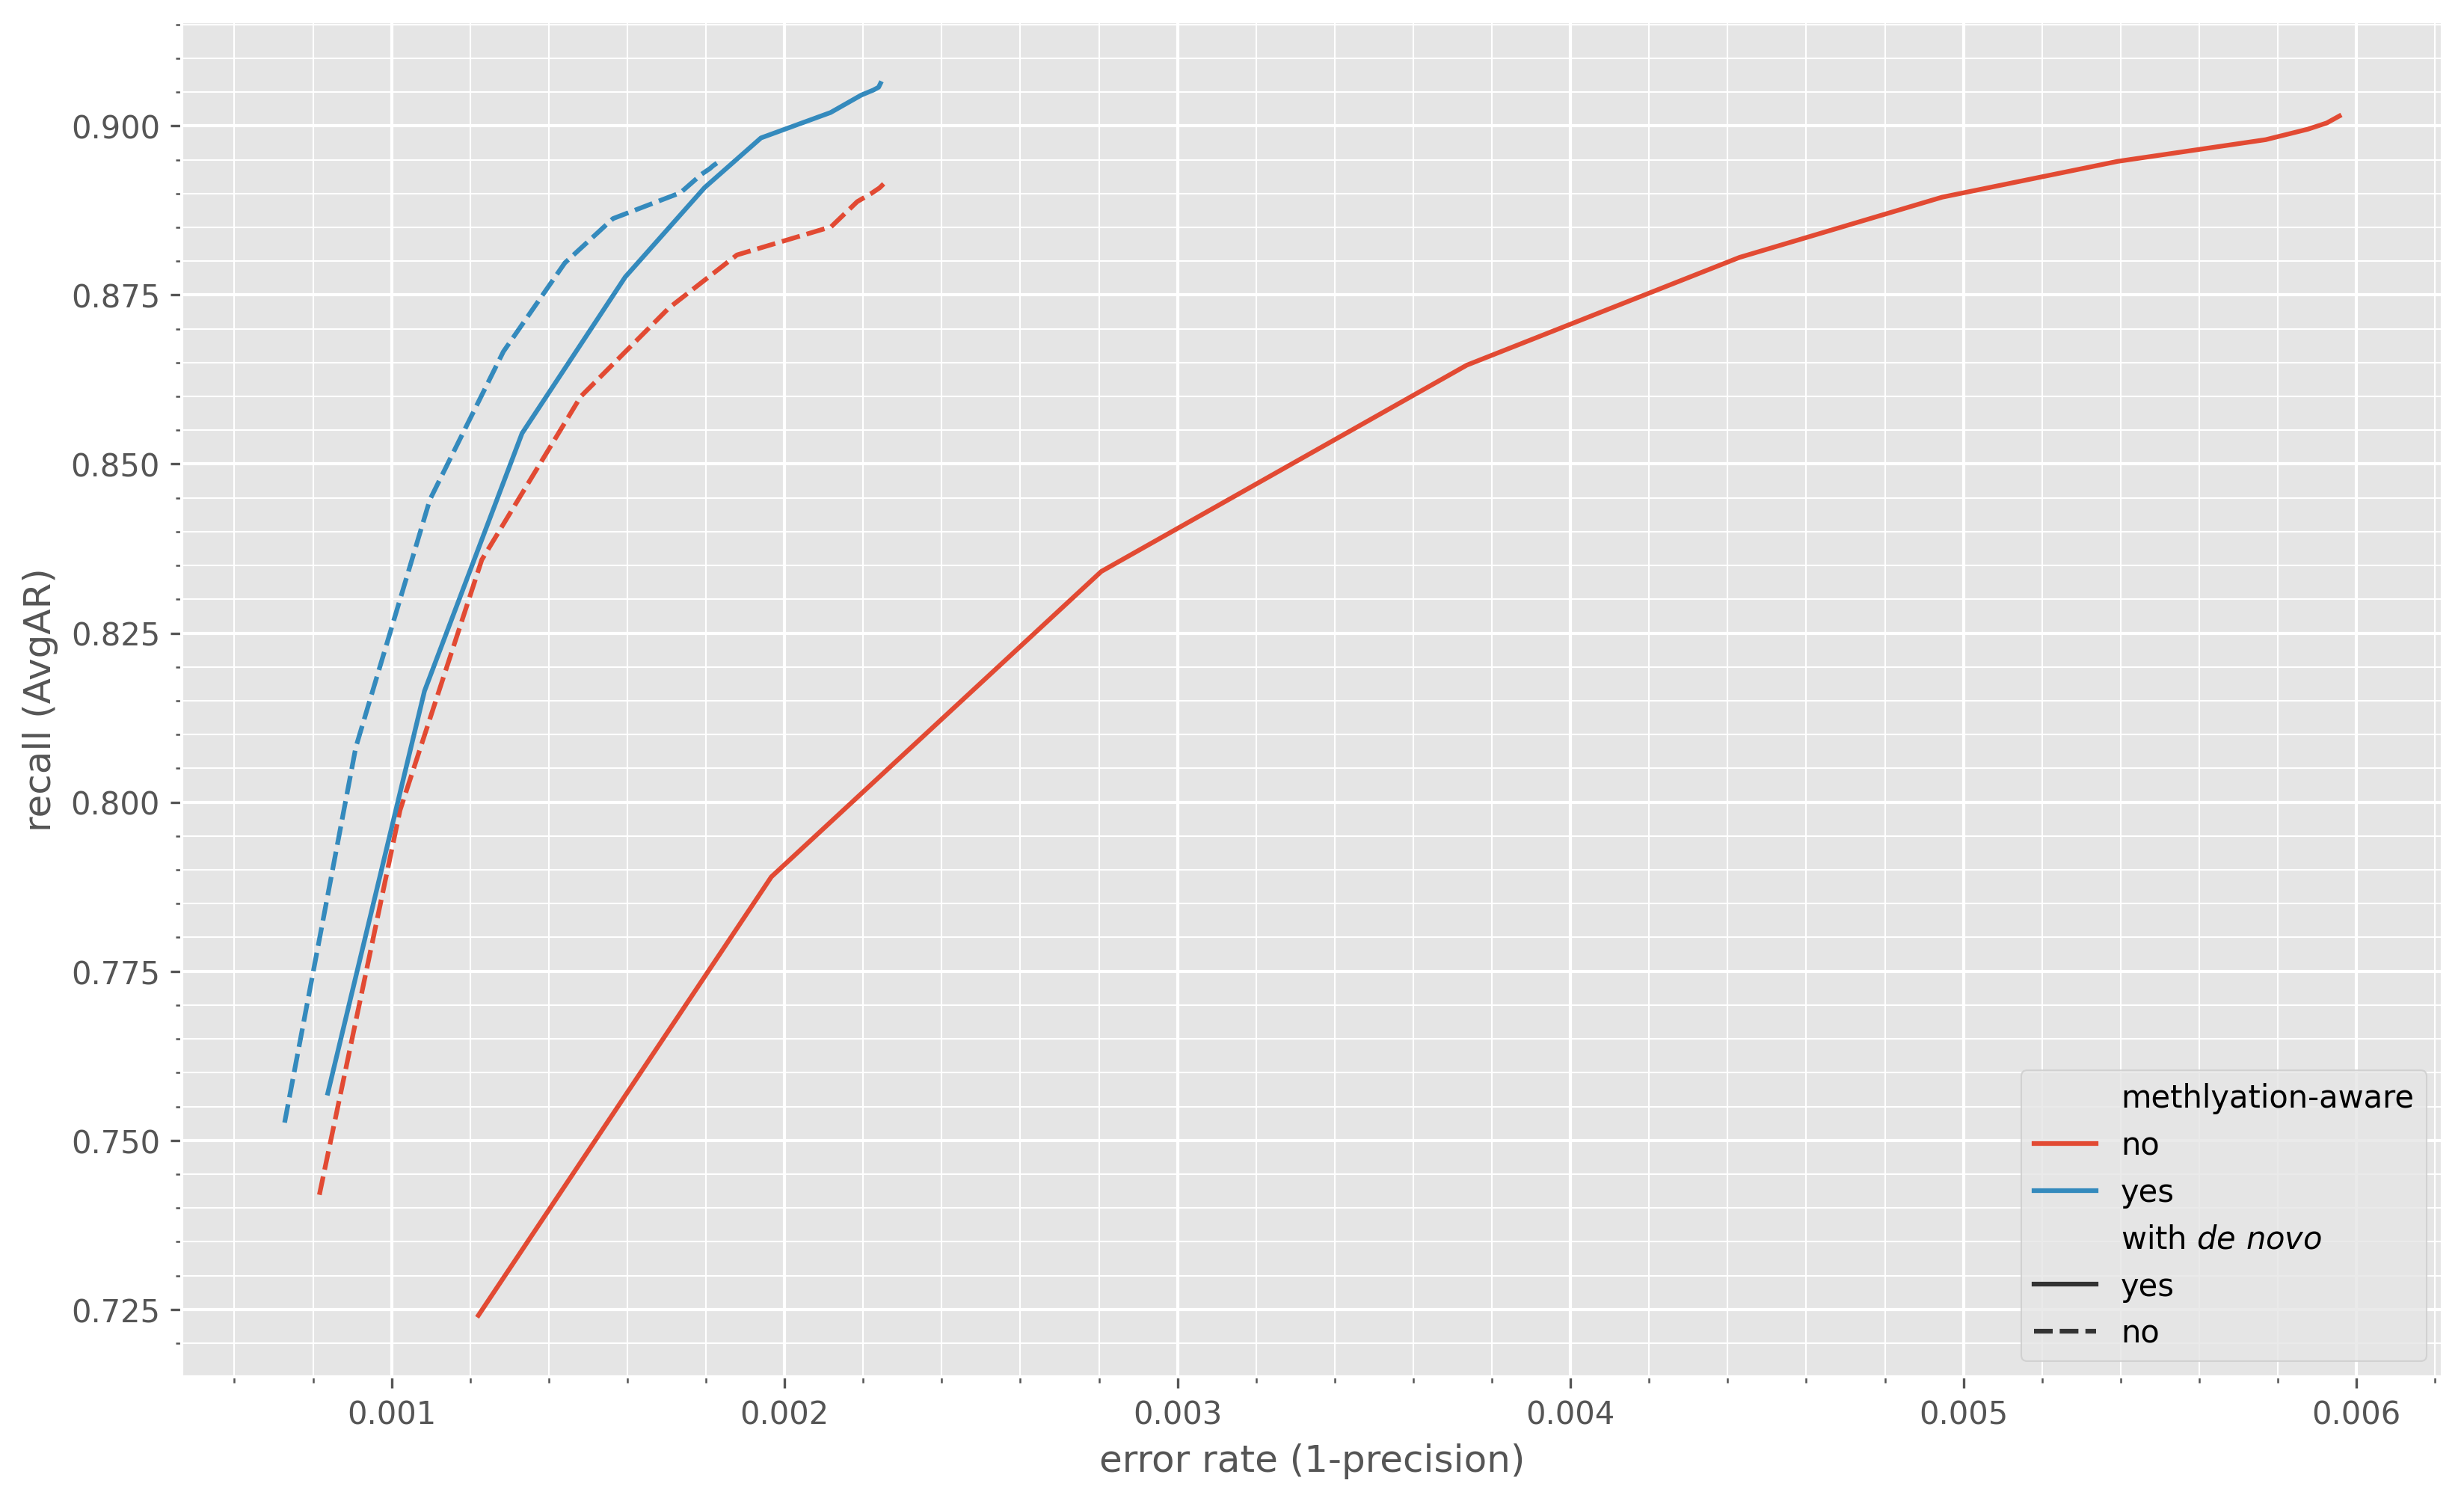

In [107]:
hue = "methylation_aware"
style = "local_assembly"
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.lineplot(data=df, x=x, y=y, ax=ax, hue=hue, style=style)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which="major", color="w", linewidth=1.0)
ax.grid(b=True, which="minor", color="w", linewidth=0.5)
ax.set(xlabel="error rate (1-precision)", ylabel="recall (AvgAR)")
handles, labels = ax.get_legend_handles_labels()
labels[0] = "methlyation-aware"
labels[3] = "with $\it{de\ novo}$"
ax.legend(handles, labels)

In [126]:
df.query("step_GT==0")[[y, "error_rate", "local_assembly", "methylation_aware"]].set_index(["local_assembly", "methylation_aware"])

,,recalls_wrt_variants_found_wrt_alleles,error_rate
local_assembly,methylation_aware,,
yes,no,0.901463,0.005956
no,no,0.891430,0.002252
yes,yes,0.906283,0.002244
no,yes,0.894699,0.001833


In [127]:
0.906283 / 0.901463

1.0053468639311873

In [128]:
0.002244 / 0.005956

0.37676292813969103

In [129]:
1000 * 0.002244

2.2439999999999998

In [130]:
1000 * 0.901463

901.463

In [132]:
0.894699 * 1000 - 0.891430 * 1000

3.269000000000119

In [134]:
1000 * 0.002252 - 1000 * 0.001833

0.41900000000000026

In [135]:
0.906283 * 1000 - 0.901463 * 1000

4.819999999999936

In [136]:
0.906283 * 1000 - 0.894699 * 1000

11.583999999999833

In [138]:
1000 * 0.002244 - 1000 * 0.001833

0.4109999999999998